# サンプルコード

## 準備

最初の動作確認

In [ ]:
1 + 2

3

## まとめ

In [6]:
!git clone https://github.com/ghmagazine/python_stat_sample.git
!mv ./python_stat_sample/data ./data
!pip install japanize-matplotlib

import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

fatal: destination path 'python_stat_sample' already exists and is not an empty directory.
mv: cannot stat './python_stat_sample/data': No such file or directory
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 個々

データのダウンロード

In [2]:
!git clone https://github.com/ghmagazine/python_stat_sample.git

Cloning into 'python_stat_sample'...
remote: Enumerating objects: 130, done.
remote: Total 130 (delta 0), reused 0 (delta 0), pack-reused 130
Receiving objects: 100% (130/130), 8.22 MiB | 16.95 MiB/s, done.
Resolving deltas: 100% (59/59), done.


必要なディレクトリの移動

In [3]:
!mv ./python_stat_sample/data ./data
!ls ./data

ch10_access.csv   ch11_potato.csv	 ch12_scores_reg.csv  ch3_anscombe.npy
ch10_enquete.csv  ch11_training_ind.csv  ch1_sport_test.csv   ch4_scores400.csv
ch11_ad.csv	  ch11_training_rel.csv  ch2_scores_em.csv


グラフの日本語化

In [4]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 4.6 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=c32659fbc4691aad1b8ef9f07d745f1092d2f1bd63b90bc109a2e981b4c31d5b
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


表示設定

In [5]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

# データの種類

## DataFrame（表）

In [ ]:
import pandas as pd

df = pd.read_csv('data/ch1_sport_test.csv', index_col='生徒番号')
df

,学年,握力,上体起こし,点数,順位
生徒番号,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


## Series（列）

In [ ]:
df['点数']

生徒番号
1     15
2      7
3     11
4     14
5     17
6      9
7     13
8     18
9     10
10    16
Name: 点数, dtype: int64

In [ ]:
df['点数'].values

array([15,  7, 11, 14, 17,  9, 13, 18, 10, 16])

# データの整理

データ読み込み

In [ ]:
df = pd.read_csv('data/ch2_scores_em.csv', index_col='生徒番号')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   英語      50 non-null     int64
 1   数学      50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [ ]:
df.head()

,英語,数学
生徒番号,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


## 代表の指標

In [ ]:
data = np.array(df['英語'][:10])
index = pd.Index(list('ABCDEFGHIJ'), name='生徒')
scores_df = pd.DataFrame({'点数': data}, index=index)
scores_df

,点数
生徒,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


平均値

In [ ]:
np.mean(scores_df)

点数    55.0
dtype: float64

中央値

In [ ]:
np.median(scores_df)

56.500

最頻値

In [ ]:
pd.Series([0, 1, 1, 2, 3, 3, 3, 4]).mode()

0    3
dtype: int64

## ばらつきの指標

偏差

In [ ]:
mean = np.mean(scores_df['点数'])
scores_df['偏差'] = scores_df['点数'] - mean
scores_df

,点数,偏差
生徒,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


偏差の平均

In [ ]:
np.mean(scores_df['偏差'])

0.000

分散

In [ ]:
scores_df['偏差二乗'] = scores_df['偏差'] ** 2
np.mean(scores_df['偏差二乗'])

86.000

np.varを使った標本分散

In [ ]:
np.var(scores_df['点数'])

86.000

pandasを使った標本分散

In [ ]:
scores_df['点数'].var(ddof=0)

86.000

データを確認

In [ ]:
scores_df

,点数,偏差,偏差二乗
生徒,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


各変数の平均

In [ ]:
scores_df.mean()

点数      55.0
偏差       0.0
偏差二乗    86.0
dtype: float64

標準偏差

In [ ]:
np.sqrt(np.var(scores_df['点数']))

9.274

NumPyを使った標準偏差

In [ ]:
np.std(scores_df['点数'])

9.274

pandasを使った標準偏差

In [ ]:
scores_df['点数'].std(ddof=0)

9.274

最大値，最小値

In [ ]:
scores_df['点数'].max(), scores_df['点数'].min()

(69, 41)

分位数

In [ ]:
np.quantile(scores_df['点数'], 0.25), np.quantile(scores_df['点数'], 0.75)

(48.250, 63.250)

In [ ]:
np.percentile(scores_df['点数'], 25), np.percentile(scores_df['点数'], 75)

(48.250, 63.250)

範囲

In [ ]:
scores_df['点数'].max() - scores_df['点数'].min()

28

四分位範囲

In [ ]:
np.quantile(scores_df['点数'], 0.75) - np.quantile(scores_df['点数'], 0.25)

15.000

## 正規化

標準化

In [ ]:
scores_df['Zスコア'] = scores_df['偏差'] / np.std(scores_df['点数'])
scores_df['Zスコア']

生徒
A   -1.402
B    1.510
C    0.108
D   -1.510
E    0.216
F   -0.755
G    1.078
H   -0.647
I    1.078
J    0.323
Name: Zスコア, dtype: float64

Zスコアの平均と標準偏差



In [ ]:
np.mean(scores_df['Zスコア']), np.std(scores_df['Zスコア'])

(-0.000, 1.000)

In [ ]:
scores_df['偏差値'] = 50 + 10 * scores_df['Zスコア']
scores_df[['点数', '偏差値']]

,点数,偏差値
生徒,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


## 視覚化

使用するデータ

In [ ]:
english_scores = df['英語']
english_scores.describe().to_frame()

,英語
count,50.00
mean,58.38
std,9.80
min,37.00
25%,54.00
50%,57.50
75%,65.00
max,79.00


度数分布表

In [28]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq_class = [f'{i}〜{i + 10}' for i in range(0, 100, 10)]

freq_dist_df = pd.DataFrame({'度数': freq}, index=pd.Index(freq_class, name='階級'))
freq_dist_df

,度数
階級,
0〜10,0
10〜20,0
20〜30,0
30〜40,2
40〜50,8
50〜60,16
60〜70,18
70〜80,6
80〜90,0


階級値

In [30]:
class_values = [(i + (i + 10)) // 2 for i in range(0, 100, 10)]
class_values

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

相対度数

In [25]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

累積相対度数

In [27]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

表にまとめる

In [31]:
freq_dist_df['階級値'] = class_values
freq_dist_df['相対度数'] = rel_freq
freq_dist_df['累積相対度数'] = cum_rel_freq
freq_dist_df

,度数,階級値,相対度数,累積相対度数
階級,,,,
0〜10,0,5,0.00,0.00
10〜20,0,15,0.00,0.00
20〜30,0,25,0.00,0.00
30〜40,2,35,0.04,0.04
40〜50,8,45,0.16,0.20
50〜60,16,55,0.32,0.52
60〜70,18,65,0.36,0.88
70〜80,6,75,0.12,1.00
80〜90,0,85,0.00,1.00


ヒストグラム

度数分布のヒストグラム

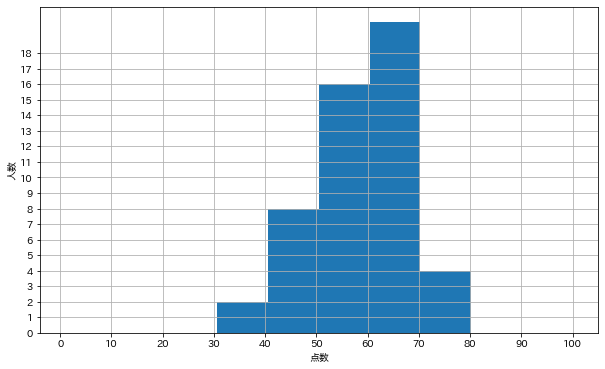

In [41]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(10, 6))
plt.hist(english_scores, bins=10, range=(1, 100))
plt.grid(True)
plt.xlabel('点数')
plt.ylabel('人数')
plt.xticks(np.linspace(0, 100, 10 + 1))
plt.yticks(np.arange(0, freq.max() + 1))
plt.show()

相対度数と累積相対度数のグラフ

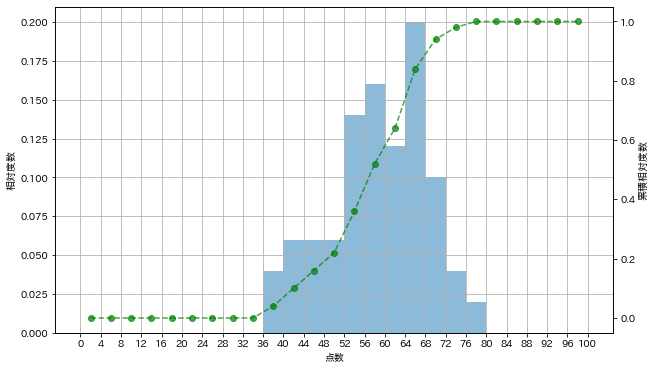

In [66]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

weights = np.ones_like(english_scores) / english_scores.shape[0]
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0, 100), weights=weights, alpha=0.5)

cum_rel_freq = np.cumsum(rel_freq)
class_values = [(i + (i + 4)) // 2 for i in range(0, 100, 4)]
ax2.plot(class_values, cum_rel_freq, ls='--', marker='o', color='green', alpha=0.7)
ax2.grid(False)

ax1.set_xlabel('点数')
ax1.set_ylabel('相対度数')
ax2.set_ylabel('累積相対度数')
ax1.set_xticks(np.linspace(0,100, 25 + 1))

ax1.grid(True)
plt.show()

箱ひげ図

matplotlibによる箱ひげ図

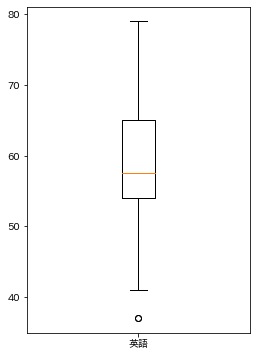

In [71]:
plt.figure(figsize=(4, 6))
plt.boxplot(english_scores, labels=['英語'])
plt.show()

seabornによる箱ひげ図

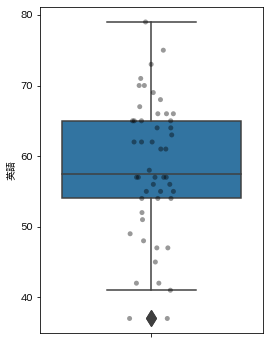

In [103]:
import seaborn as sns

english_scores_df = english_scores.to_frame().reset_index()

plt.figure(figsize=(4, 6))
sns.boxplot(y='英語', data=english_scores_df, fliersize=12)
sns.stripplot(y='英語', data=english_scores_df, jitter=True, color='black', alpha=0.4)
plt.show()

# 2次元データ

In [9]:
df = pd.read_csv('data/ch2_scores_em.csv', index_col='生徒番号')

scores_df = df[:10].copy()
scores_df.index = pd.Index(list('ABCDEFGHIJ'), name='生徒')
scores_df

,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


## 相関

偏差の積

In [16]:
scores_df['英語の偏差'] = scores_df['英語'] - scores_df['英語'].mean()
scores_df['数学の偏差'] = scores_df['数学'] - scores_df['数学'].mean()
scores_df['偏差の積'] = scores_df['英語の偏差'] * scores_df['数学の偏差']
scores_df

,英語,数学,英語の偏差,数学の偏差,偏差の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


共分散

In [17]:
scores_df['偏差の積'].mean()

62.800

共分散行列

In [29]:
cov_mat = np.cov(scores_df['英語'], scores_df['数学'], ddof=0)
cov_mat = pd.DataFrame(cov_mat, columns=['英語', '数学'], index=['英語', '数学'])
cov_mat

,英語,数学
英語,86.0,62.80
数学,62.8,68.44


相関係数

In [35]:
en_s = scores_df['英語の偏差'] / np.std(scores_df['英語'])
ma_s = scores_df['数学の偏差'] / np.std(scores_df['数学'])
np.mean(en_s * ma_s)

0.819

相関行列

NumPyのcorrcoef

In [10]:
corr_mat = np.corrcoef(scores_df['英語'], scores_df['数学'])
corr_mat = pd.DataFrame(corr_mat, columns=['英語', '数学'], index=['英語', '数学'])
corr_mat

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


pandasのcorr

In [11]:
scores_df[['英語', '数学']].corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


## 視覚化

散布図

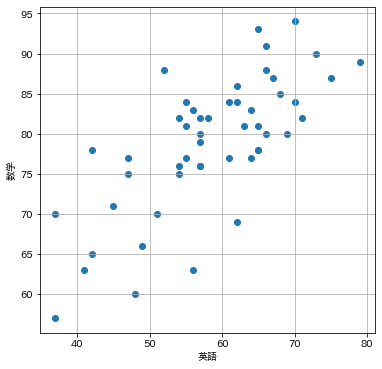

In [11]:
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(6, 6))
plt.scatter(df['英語'], df['数学'])
plt.xlabel('英語')
plt.ylabel('数学')
plt.grid(True)
plt.show()

回帰直線

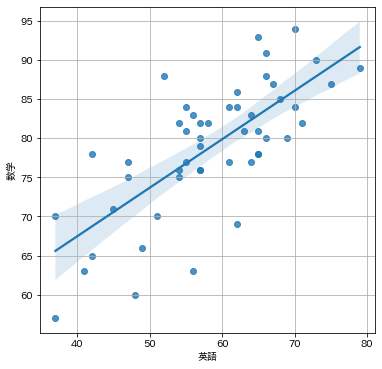

In [19]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.regplot(x='英語', y='数学', data=df, fit_reg=True)
plt.grid(True)
plt.show()

ヒートマップ

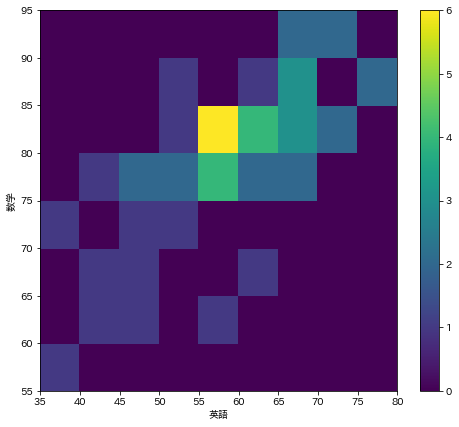

In [24]:
fig = plt.figure(figsize=(8, 7))
c = plt.hist2d(df['英語'], df['数学'], bins=[9, 8], range=[(35, 80), (55, 95)])
plt.xticks(c[1])
plt.yticks(c[2])
plt.xlabel('英語')
plt.ylabel('数学')
plt.colorbar(c[3])
plt.show()